In [1]:
#import libraries here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [43]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 1.2 MB/s eta 0:00:001m709.6 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


We create wrangle function, limit rooms to 10 and 90 percentile and homes worth less than $30000

In [9]:
def wrangle(filepath):

    #load csv file
    df = pd.read_csv(filepath)

    #
    #mask value
    mask_val= df["value of homes"] < 30
    
    df=df[mask_val]

    #mask rooms
    low, high= df["Number of rooms"].quantile([0.10, 0.90])
    mask_rms=df["Number of rooms"].between(low, high)
    
    df= df[mask_rms] 
    #drop columns
    columns_to_drop =['Crime rate', 'Land zoned', 'Non-retail business', 'Charles river',
       'Nitric oxide conc', 'Age', 'Weighted distances',
       'Radial highways', 'Tax rate', 'Pupil-teacher ratio',
       'Proportion of blacks', 'Lower status']
    
    df = df.drop(columns=columns_to_drop)   


    return df

1. Explore

In [10]:
df= wrangle("./boston_cleaned.csv")
print(df.shape)
print(df.info())
df.head()


(336, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 505
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number of rooms  336 non-null    float64
 1   value of homes   336 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None


,Number of rooms,value of homes
0,6.575,24.0
1,6.421,21.6
5,6.430,28.7
6,6.012,22.9
7,6.172,27.1


1. Explore

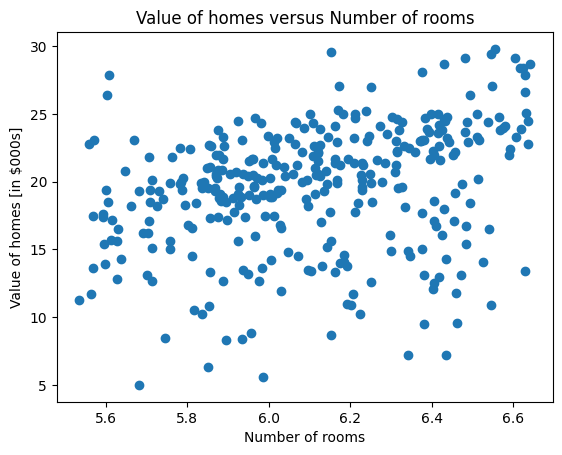

In [30]:
#visualize through scatter
fig=plt.scatter(x='Number of rooms', y='value of homes', data=df);

#Add labels
plt.xlabel("Number of rooms")
plt.ylabel("Value of homes [in $000s]")
plt.title("Value of homes versus Number of rooms")
fig

2. Split
A key part of model building is separating the target (what you want to predict) from the features (like independent variables)

In [32]:
feature =["Number of rooms"]
X_train = df[feature]
X_train.head()
print(X_train.shape)

(336, 1)


In [37]:
target= "value of homes"
y_train=df[target]
type(y_train)

pandas.core.series.Series

Build Model

In [38]:
#baseline, naive, dumb model
y_mean =y_train.mean()
y_mean

19.560119047619047

In [40]:
#List of mean - baseline
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[19.560119047619047,
 19.560119047619047,
 19.560119047619047,
 19.560119047619047,
 19.560119047619047]

In [46]:
#mean absolute error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print(f"Mean home value: {y_mean}")
print(f"Baseline MAE: {mae_baseline}")
print(f"It means that if we always predict mean value of homes say {y_mean}, the prediction would be off by {mae_baseline}")

Mean home value: 19.560119047619047
Baseline MAE: 3.656296060090703
It means that if we always predict mean value of homes say 19.560119047619047, the prediction would be off by 3.656296060090703


3. Iterate

In [47]:
#begin making model
#instantiate linear regression model from sklearn
model = LinearRegression()

In [49]:
#fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

In [50]:
#list of predictions
y_pred_training = model.predict(X_train)
y_pred_training[:5]


array([21.89935964, 21.12290901, 21.16828599, 19.06077714, 19.86747909])

In [56]:
#training mae
mae_training = mean_absolute_error(y_train, y_pred_training)
print(f'mae_training: {mae_training}')
print(f" The mae_training < mae_baseline - therefore, model provides better prediction") 


mae_training: 3.4254755835067154
 The mae_training < mae_baseline - therefore, model provides better prediction


Communicate Results
y = mx + b

In [60]:
#extract intercept
intercept = model.intercept_
#extract coefficient
coefficient= model.coef_
print("Intercept of linear regression model:", intercept)
print("Coefficient of linear regression model:", coefficient)
print(f'The prediction model : Value of home = ${coefficient} x Number of rooms + ${intercept}')
print("Note that the model was not tested, to see how it would perform given new data")

Intercept of linear regression model: -11.251048703294945
Coefficient of linear regression model: [5.0418872]
The prediction model : Value of home = $[5.0418872] x Number of rooms + $-11.251048703294945
Note that the model was not tested, to see how it would perform given new data
